<a href="https://colab.research.google.com/github/harperd/machine-learning/blob/master/notebooks/univariate-linear-regression-with-gradient-descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate Linear Regression and Gradient Descent

## Import Python Packages

In [0]:
# NumPy adds support for large, multi-dimensional arrays and matrices, along with a large collection 
# of high-level mathematical functions to operate on these arrays.
import numpy as np

# Matplotlib is a plotting library for the Python programming language and its numerical mathematics 
# extension NumPy. It provides an object-oriented API for embedding plots into applications using 
# general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.
import matplotlib.pyplot as plt
%matplotlib inline

# Pandas is a software library for data manipulation and analysis. In particular, it offers data 
# structures and operations for manipulating numerical tables and time series.
import pandas as pd

# Hypothesis Function

In machine learning, a *hypothesis* function is used to predict outcomes or $y$ values. Below is the univariate linear regression hypothesis function where theta ($\theta$) can represent any two numbers and $h_\theta(x)$ or $y$ is our *prediction*. We just have to figure out what those two numbers are that allow the function to best intersect our data or features. It's a simple linear equation but finding the best theta values is where the challenge lies.

> $h_{\theta }( x) =\theta _{0} \ +\ \theta _{1} x$

In [0]:
# Hypothesis Function - This function will compute predictions for all features. 
#
# Parameters
#     theta: The two theta values as an array [ theta1, theta2 ]
#     X: A DataFrame containing the features to create predictions against.
def hypothesis(theta, X):
    # Here, X is a Pandas DataFrame containing all of our data.
    # X.shape returns tuple of the shape's dimentions in rows x columns.
    # Therefore, X.shape[0] will get us the number of rows, or features.
    # num_features = X.shape[0]
    num_features = len(X)
    
    # numpy.ones returns a new array of given shape, filled with ones.
    # Here, we want a new array (vector) of size num_features x 1 (rows x columns).
    h = np.ones((num_features, 1))
    
    # Loop through each feature (x) in our data set.
    #
    # TODO: Perform this in a more optimal manner using matrix multiplication
    #       against the entire feature set, X.
    for i in range(0, num_features):
        # Get the next feature value.
        feature_value = X[i]
        
        # Here, we are going to concatinate a 1x1 vector containing the value 
        # of 1 with a 1x1 vector containing the feature value with the result 
        # being a 1x2 vector.
        #
        # After the concatination, our 1x2 vector resembles the below, if our
        # feature_value = 3:
        #
        #    x = [ 1 3 ]
        #
        vector_one = np.ones(1)
        vector_feature = np.array(feature_value)
        
        x = np.concatenate((vector_one, vector_feature), axis = 0)
        
        # Finally, we multiply the vector x with our two theta values and
        # assign it to h[i]:
        #
        # h[i] = [ theta1 theta2 ] * [ 1 feature ]
        #
        h[i] = float(np.matmul(theta, x))
    
    
    # Here, we have a vector (h) with our predictions with a size of 
    # num_features x 1 (rows x columns). we need to reshape the vector so it 
    # matches the same number of rows as our DataFrame, X.
    #
    # TODO: Why do we need to reshape?
   # h = h.reshape(num_features)
    
    return h

We can choose good theta values by using the *Cost Function* denoted as $J(\theta_{0}, \theta_{1})$ where  $\theta_{0}$, and $\theta_{1}$ points on the $x$,$y$ axis and $J(\theta_{0}, \theta_{1})$ is *z*. This is also called the *Squared Error Function* which is the most commonly used for linear regression problems. Here, we want to get the results of our cost function as close to zero as possible by trying different values for $\theta _{0}$ and $\theta _{1}$.

> $\large J( \theta _{0} ,\ \theta _{1}) =\frac{1}{2m}\sum\limits ^{m}_{i=1}\left( h_{\theta }\left( x^{( i)}\right) -y^{( i)}\right)^{2}$

In [0]:
def cost(theta, X, y):
  m = len(y)
  # Perform matrix multiplication between our feature set X and theta values.
  predictions = hypothesis(theta, X)
  # Compute the cost of the predictions
  cost = (1/2*m) + np.sum(np.square(predictions - y))
  return cost

## Gradient Descent

What *Gradient Descent* algorithm does is *simultaneously* compute values for $\theta_{0}$ and $\theta_{1}$. What is meant by *simultaneously* is represented in the pseudo code below where $\theta_{0}$ and $\theta_{1}$ are assigned new values at the same time. In other words, if $\theta_{0}$ was set ($\theta_{0} :=$ *temp0*) *before* temp1 was set (*temp1* $:= \theta_{1}-\alpha\frac{\partial}{\partial\theta_{1}}J(\theta_{0},\theta_{1})$) then it would affect the results of temp1 and yield incorrect results. We want to repeat this series of steps until we reach *convergence* or $\theta_{0}$ and $\theta_{1}$ are at their minimum.

>*repeat until convergence {* 

>$temp 0:= \theta_{0}-\alpha\frac{1}{m}\sum\limits ^{m}_{i=1}\left( h_{\theta }\left( x^{(i)}\right) -y^{( i)}\right)$

>$temp1 := \theta_{1}-\alpha\frac{1}{m}\sum\limits ^{m}_{i=1}\left( h_{\theta }\left( x^{(i)}\right) -y^{( i)}\right)\cdot x^{(i)}$

>$\theta_{0} := temp0$

>$\theta_{1} := temp1$

>*}* 

In [0]:
# Stochastic Gradient Descent Algorithm - Performs Gradient Descent.
#
# Parameters
#     theta: The two theta values as an array [ theta1, theta2 ]
#     alpha: The learning rate.
#     iterations: The number of iterations to perform.
#     X: The feature set.
#     y: The target variable set.
def gradient_descent(theta, alpha, X, y):
    m = len(y)
    prev_cost = 0
    converged = False
    i = 1

    while(not converged):
        predictions = hypothesis(theta, X) #np.dot(X, theta)
        loss = predictions - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        
        if (cost == prev_cost):
          converged = True
        else:
          prev_cost = cost
        
        if(i % 10 == 0):
          print("Iteration %d | Cost: %f" % (i, cost))
          
        # avg gradient per example
        gradient = np.dot(X.T, loss) / m
        # update
        theta = theta - alpha * gradient

    return theta[len(theta) - 1]

In [0]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

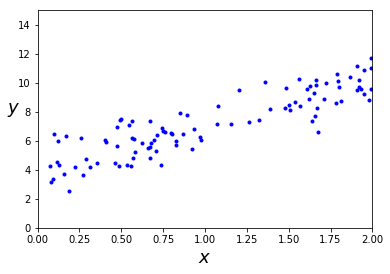

In [27]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [48]:
theta = np.random.randn(2)
learning_rate = 0.1

theta = gradient_descent(theta, learning_rate, X, y)

print(f"theta0 = {theta[0]}")
print(f"theta1 = {theta[1]}")

theta0 = 2.1818163202334335
theta1 = 4.40038390772812


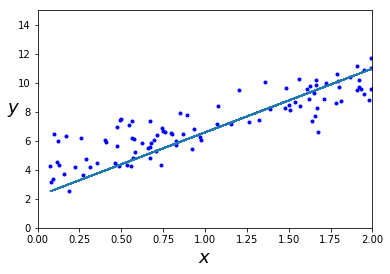

In [50]:
training_predictions = hypothesis(theta, X)

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(X, training_predictions)
_ =plt.axis([0,2,0,15])